In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [28]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
# The images are 28x28 NumPy arrays, with
# pixel values ranging between 0 and 255.
# The labels are an array of integers, ranging from 0 to 9.
# These correspond to the class of clothing the image represents:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

In [26]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

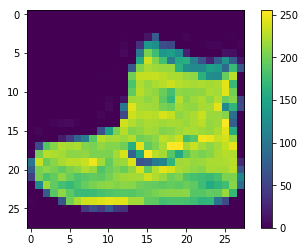

In [36]:
# PLot the 1st image of test of train data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
# scale these values to a range of 0 to 1 before feeding to the neural network mode
# by dividing the values by 255
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

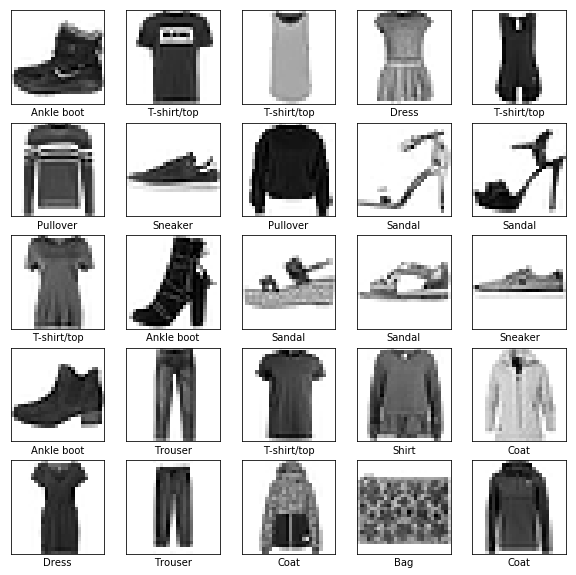

In [38]:
# Display the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
# Build Sequential Model
model = keras.Sequential([
#  transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels    
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [40]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# fit the train data into model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 23s 385us/sample - loss: 0.4910 - acc: 0.8286
Epoch 2/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3725 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.3366 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.3101 - acc: 0.8869
Epoch 5/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2938 - acc: 0.8932


In [42]:
# Evaluate the model with test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.3726 - acc: 0.8668
Test accuracy: 0.8668


In [44]:
# With the model trained, make predictions about some images.
predictions = model.predict(test_images)

In [45]:
# check prediction result of the label generated from first test image 
predictions[0]

array([1.1743833e-04, 1.7348713e-08, 4.8494734e-08, 2.5842223e-07,
       1.1451828e-06, 1.3222611e-02, 7.4988448e-06, 2.7717894e-01,
       5.1490223e-04, 7.0895714e-01], dtype=float32)

In [46]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.
# We can see which label has the highest confidence value:
np.argmax(predictions[0])

9

In [54]:
# the model is most confident that this image is an ankle boot, or class_names[9]
test_labels[0]
class_names[test_labels[0]]

'Ankle boot'

In [55]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [56]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

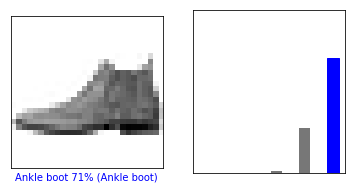

In [57]:
# look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

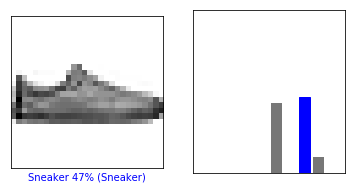

In [58]:
# look at the 12th image, predictions, and prediction array.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

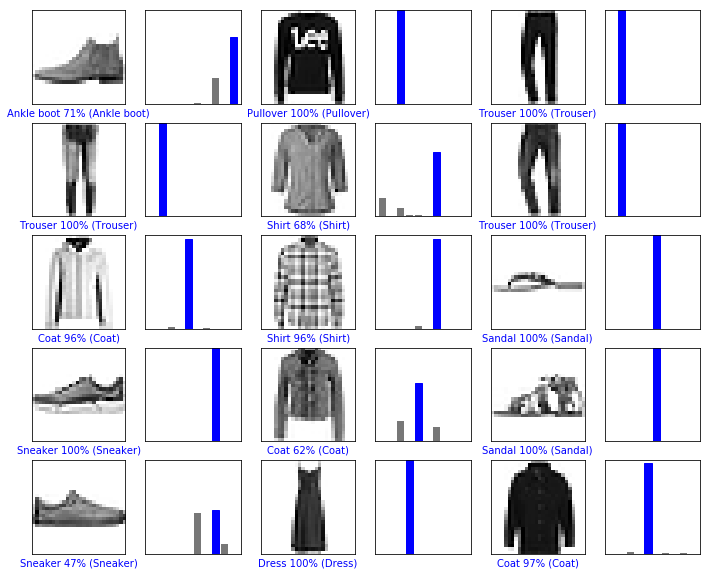

In [59]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [60]:
# use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [61]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [62]:
# make prediction from this batch
predictions_single = model.predict(img)

print(predictions_single)

[[1.1743813e-04 1.7348716e-08 4.8494741e-08 2.5842178e-07 1.1451797e-06
  1.3222602e-02 7.4988238e-06 2.7717885e-01 5.1490130e-04 7.0895725e-01]]


9

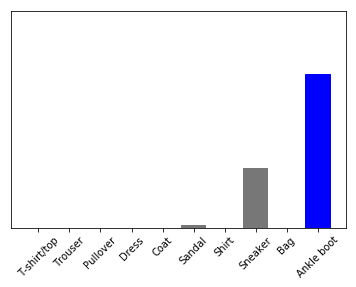

In [63]:
# plot which classes with highest confidence
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])